In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('max_columns', 100)
%matplotlib inline

In [57]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [58]:
def standardize_nan(x):
    x_mean = np.nanmean(x)
    x_std = np.nanstd(x)
    return (x - x_mean) / x_std

In [59]:
def add_dummies(obj, source, drop_unknown=True):
    col_name = source.name
    dummies = pd.get_dummies(source, prefix=col_name)
    name_unknown = col_name + '_unknown'
    if drop_unknown == True:
        if name_unknown in dummies.columns:
            dummies.drop([name_unknown], axis=1, inplace=True)
    return pd.concat([obj, dummies], axis=1, sort=False)

In [60]:
def add_yn_map(obj, source):
    yn = source.map({'yes':1, 'no':0})
    return pd.concat([obj, yn], axis=1, sort=False)

In [61]:
df_train_raw = pd.read_csv('../input/train.csv')
df_test_raw = pd.read_csv('../input/test.csv')
df_train = df_train_raw.copy()
df_test = df_test_raw.copy()
train_len = len(df_train)

In [62]:
df_train.head(10)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1
5,6,29,blue-collar,single,secondary,no,260,yes,no,unknown,2,jun,707,14,-1,0,unknown,1
6,7,37,services,married,secondary,no,52,yes,no,cellular,6,sep,908,1,185,9,success,1
7,8,32,technician,single,secondary,no,230,yes,no,cellular,18,may,442,1,266,8,failure,1
8,9,31,admin.,single,secondary,no,0,yes,no,cellular,7,may,895,2,295,2,failure,1
9,10,32,self-employed,single,tertiary,no,1815,no,no,telephone,10,aug,235,1,102,2,failure,1


In [63]:
df_test.head(10)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,30,management,single,tertiary,no,1028,no,no,cellular,4,feb,1294,2,-1,0,unknown
1,2,39,self-employed,single,tertiary,no,426,no,no,unknown,18,jun,1029,1,-1,0,unknown
2,3,38,technician,single,tertiary,no,-572,yes,yes,unknown,5,jun,26,24,-1,0,unknown
3,4,34,technician,single,secondary,no,-476,yes,no,unknown,27,may,92,4,-1,0,unknown
4,5,37,entrepreneur,married,primary,no,62,no,no,cellular,31,jul,404,2,-1,0,unknown
5,6,43,services,married,primary,no,574,yes,no,cellular,8,may,140,1,-1,0,unknown
6,7,54,technician,married,secondary,no,324,yes,no,telephone,13,may,51,1,-1,0,unknown
7,8,41,blue-collar,married,secondary,no,121,yes,no,cellular,13,may,16,6,176,5,other
8,9,52,housemaid,married,primary,no,1466,no,yes,cellular,20,nov,150,1,-1,0,unknown
9,10,32,management,married,secondary,no,6217,yes,yes,cellular,18,nov,486,2,181,2,failure


In [64]:
df_train.describe().astype(int)

,id,age,balance,day,duration,campaign,pdays,previous,y
count,27128,27128,27128,27128,27128,27128,27128,27128,27128
mean,13564,40,1355,15,260,2,40,0,0
std,7831,10,3003,8,260,3,100,2,0
min,1,18,-6847,1,0,1,-1,0,0
25%,6782,33,72,8,104,1,-1,0,0
50%,13564,39,449,16,182,2,-1,0,0
75%,20346,48,1428,21,323,3,-1,0,0
max,27128,95,102127,31,4918,63,871,275,1


In [65]:
df_test.describe().astype(int)

,id,age,balance,day,duration,campaign,pdays,previous
count,18083,18083,18083,18083,18083,18083,18083,18083
mean,9042,40,1371,15,254,2,39,0
std,5220,10,3105,8,253,3,99,1
min,1,18,-8019,1,0,1,-1,0
25%,4521,33,72,8,102,1,-1,0
50%,9042,39,447,16,178,2,-1,0
75%,13562,48,1427,21,314,3,-1,0
max,18083,95,98417,31,3881,50,854,58


In [66]:
df_train.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [67]:
df_test.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

欠損値なし

'id'を落とす

In [68]:
#df_train = df_train.drop(['id'], axis=1)

'day' を文字列に

In [69]:
#df_train['day'] = df_train.day.astype(str)

### プロット用関数

In [70]:
def plot_dist_num(data, col_name):
    plt.figure(figsize=(15,2))
    plt.hist(data[col_name], bins=20)
    plt.title(col_name)
    plt.show()

In [71]:
def plot_dist_obj(data, col_name):
    plt.figure(figsize=(15,2))
    #data[col_name].value_counts().plot(kind='bar')
    sns.countplot(data[col_name])
    plt.title(col_name)
    plt.show()

In [72]:
def plot_dist(data):
    num_cols = data.select_dtypes(include='number').columns
    obj_cols = data.select_dtypes(exclude='number').columns
    
    for col_name in num_cols:
        plot_dist_num(data, col_name)
    
    for col_name in obj_cols:
        plot_dist_obj(data, col_name)

In [73]:
def plot_vs_num(data, col_name, y_name):
    plt.figure(figsize=(15,2))
    col_bin = pd.cut(data[col_name], bins=10)
    sns.barplot(x=col_bin, y=data[y_name])
    plt.ylabel(y_name)
    plt.title(col_name + '_bin')
    plt.show()

In [74]:
def plot_vs_obj(data, col_name, y_name):
    plt.figure(figsize=(15,2))
    sns.barplot(data = data, y=y_name, x=col_name)
    #plt.xlabel(col_name)
    plt.ylabel(y_name)
    plt.title(col_name)
    plt.show()

In [75]:
def plot_vs(data, y_name):
    num_cols = data.select_dtypes(include='number').columns
    obj_cols = data.select_dtypes(exclude='number').columns
    
    for col_name in num_cols:
        plot_vs_num(data, col_name, y_name)
    
    for col_name in obj_cols:
        plot_vs_obj(data, col_name, y_name)

### まとめてプロット

In [76]:
def plot_box(data, col_name):
    plt.figure(figsize=(15,4))
    sns.boxplot(data = data, x='y', y=col_name)
    plt.ylabel(col_name)
    plt.xlabel('y')
    plt.title(col_name)

In [77]:
def plot_violin(data, col_name):
    plt.figure(figsize=(15,4))
    sns.violinplot(data = data, x='y', y=col_name)
    plt.ylabel(col_name)
    plt.xlabel('y')
    plt.title(col_name)

In [78]:
train_num_cols = df_train.select_dtypes(include='number').columns
train_obj_cols = df_train.select_dtypes(exclude='number').columns

#### y vs. 連続データ (violinplot)

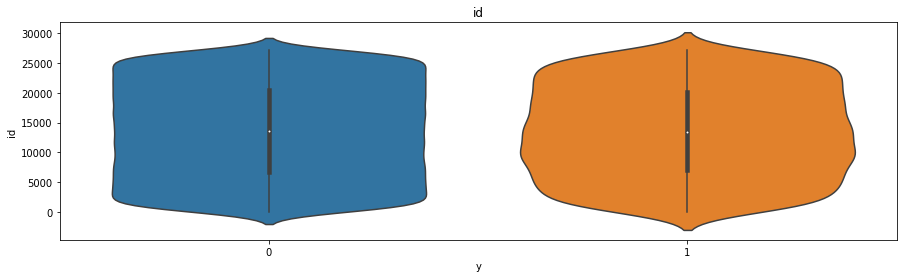

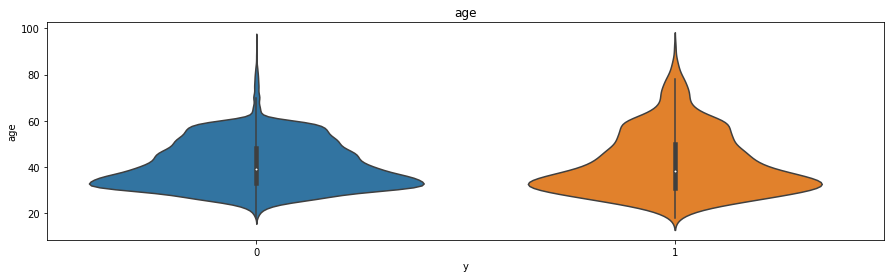

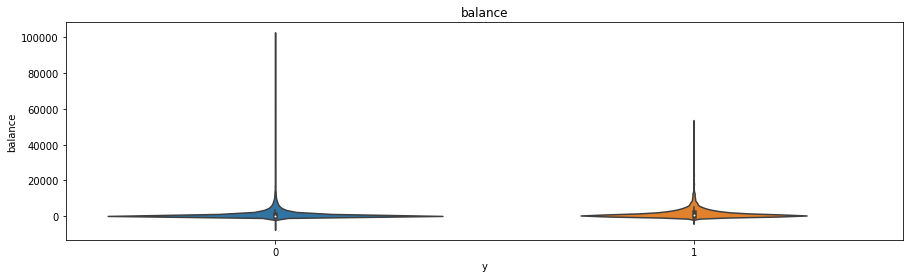

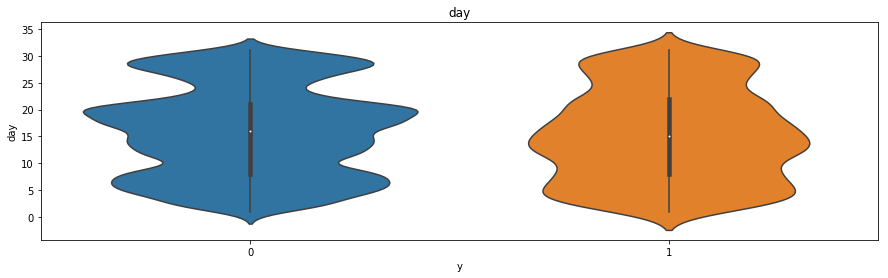

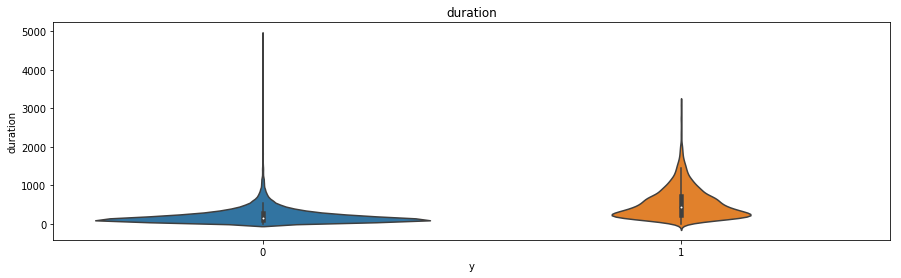

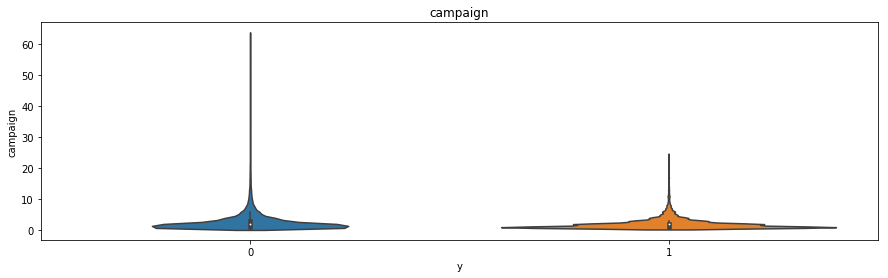

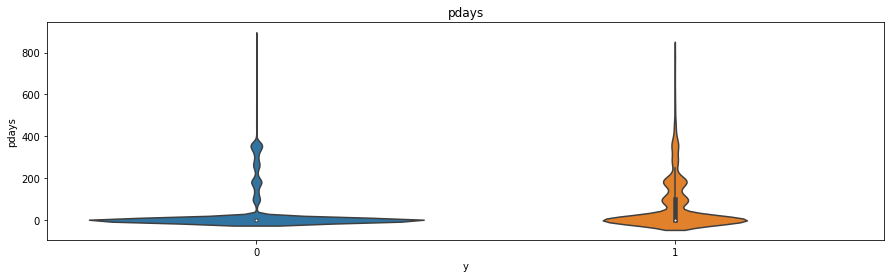

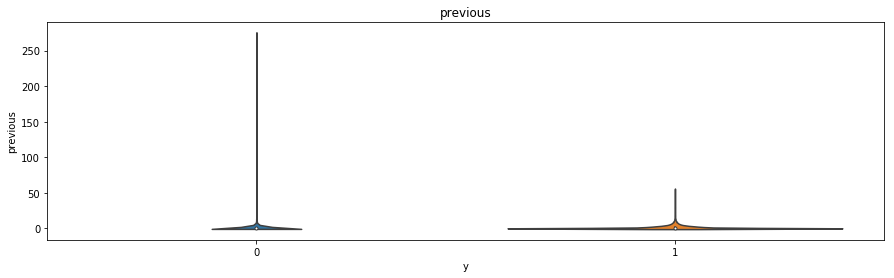

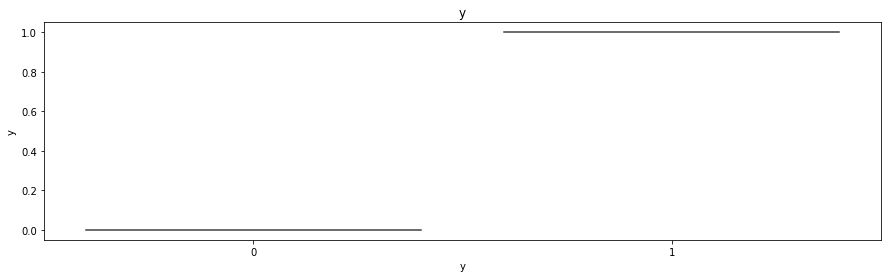

In [79]:
for col_name in train_num_cols:
    plot_violin(df_train, col_name)

#### y vs. 連続データ (boxplot)

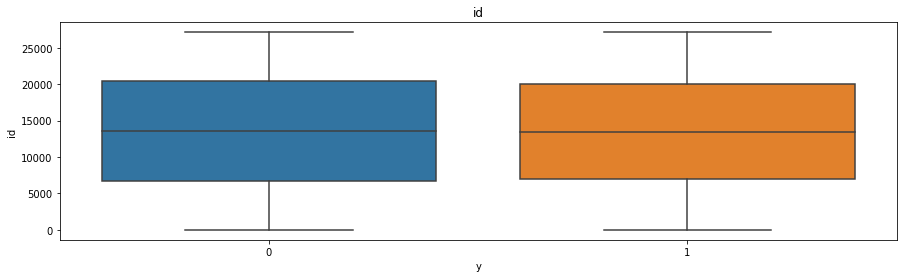

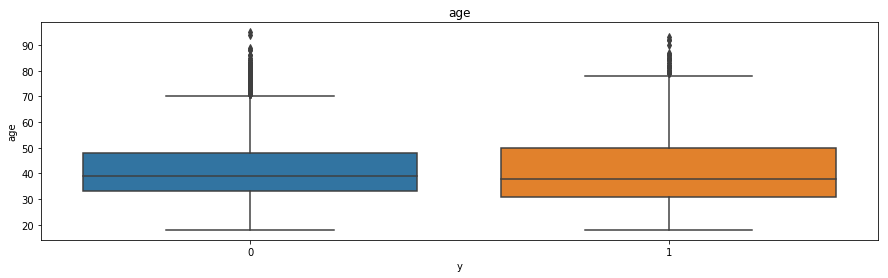

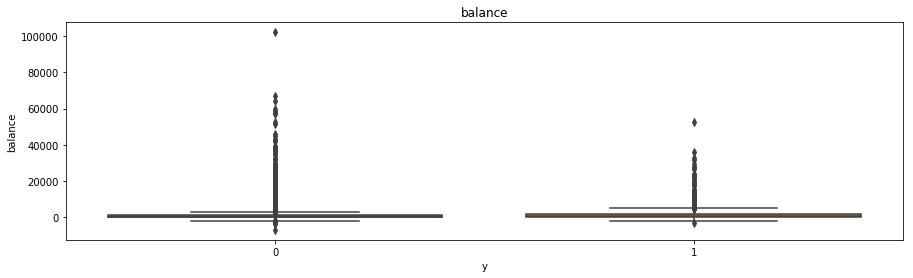

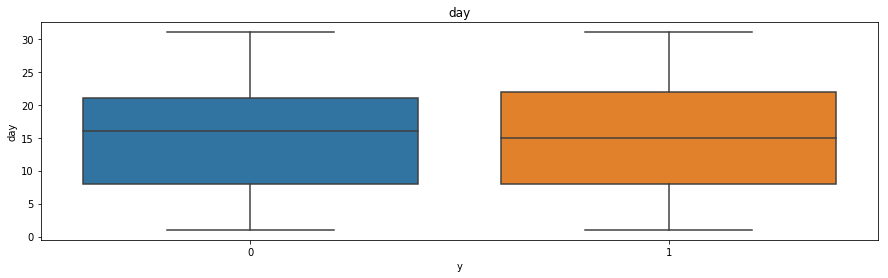

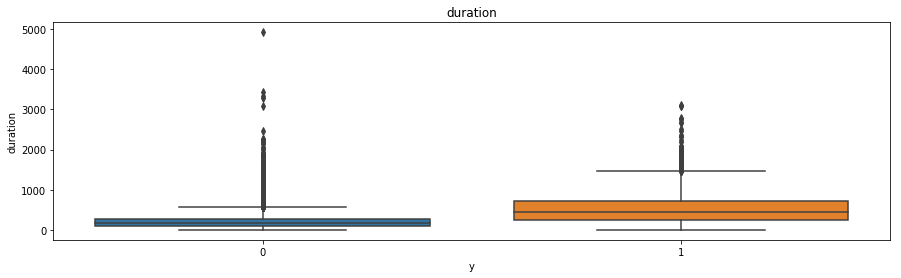

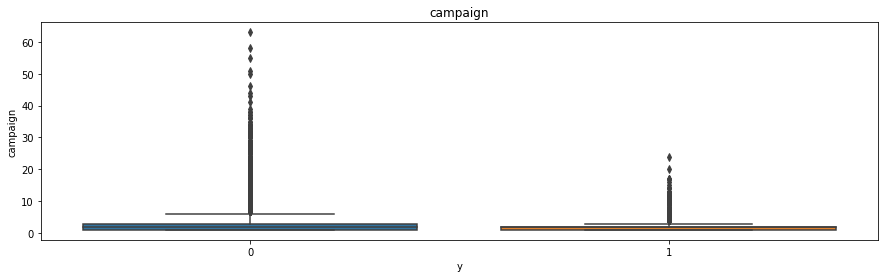

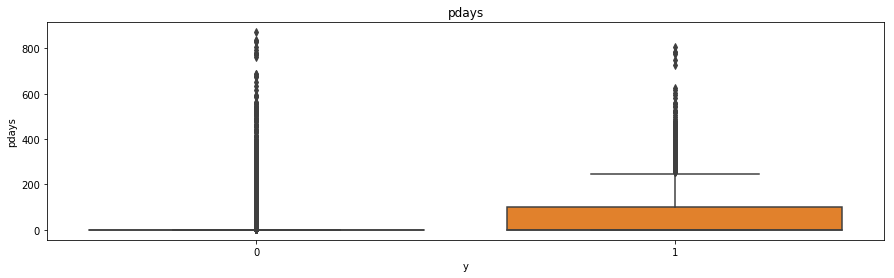

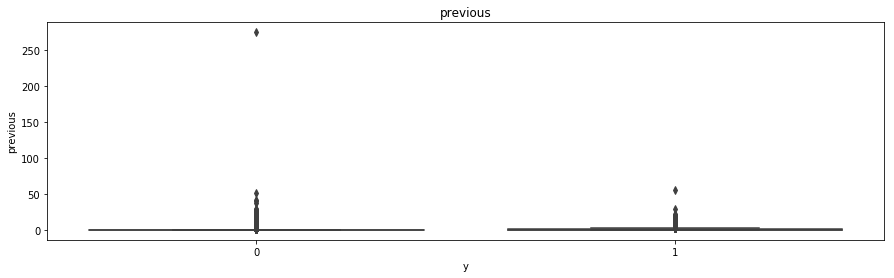

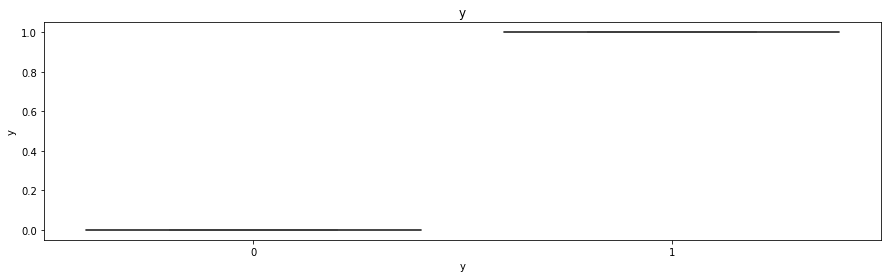

In [80]:
for col_name in train_num_cols:
    plot_box(df_train, col_name)

## 外れ値を確認

- balance

In [81]:
df_train[df_train.balance>80000]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
16312,16313,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,unknown,0


In [82]:
outliers = df_train[df_train.balance>80000]

- duration

In [83]:
df_train[df_train.duration>4000]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
9236,9237,59,technician,married,tertiary,no,6573,yes,no,telephone,10,nov,4918,1,-1,0,unknown,0


In [84]:
outliers = pd.concat([outliers, df_train[df_train.duration>4000]], axis=0)

- previous

In [85]:
df_train[df_train.previous>100]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3140,3141,40,management,married,tertiary,no,543,yes,no,cellular,2,feb,349,2,262,275,other,0


In [86]:
outliers = pd.concat([outliers, df_train[df_train.previous>100]], axis=0)

外れ値全体  
balance, duration, previous

In [87]:
outliers

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
16312,16313,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,unknown,0
9236,9237,59,technician,married,tertiary,no,6573,yes,no,telephone,10,nov,4918,1,-1,0,unknown,0
3140,3141,40,management,married,tertiary,no,543,yes,no,cellular,2,feb,349,2,262,275,other,0


In [88]:
df_train = df_train.drop(outliers.index, axis=0)

## new_features

In [89]:
train_len = len(df_train)

In [90]:
df = pd.concat([df_train, df_test], axis=0, ignore_index=True, sort=False)

indexは振り直している

In [91]:
df_new = pd.DataFrame(df['y']).copy()

### age
年齢

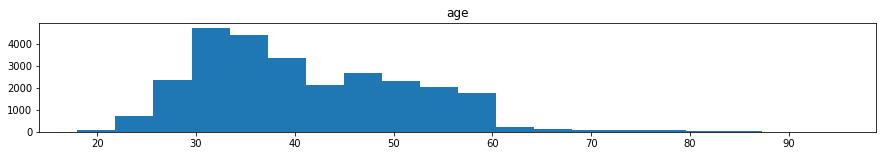

In [92]:
plot_dist_num(df_train, 'age')

In [93]:
df_new['age_log'] = np.log(df.age)
df_new['age_log'] = standardize_nan(df_new['age_log'])

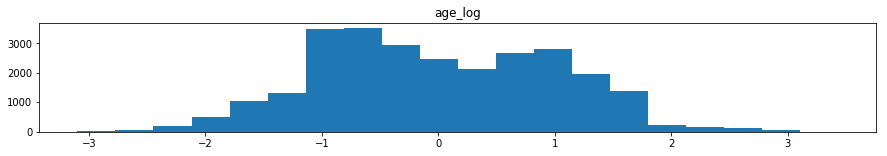

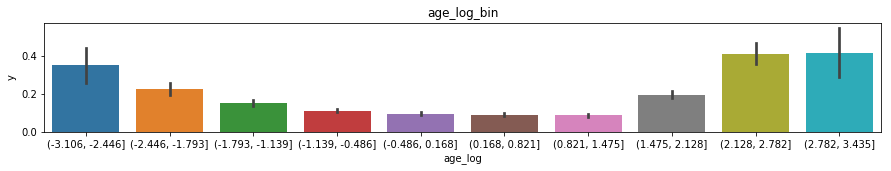

In [94]:
plot_dist_num(df_new.dropna(), 'age_log')
plot_vs_num(df_new.dropna(), 'age_log', 'y')

### job
職種

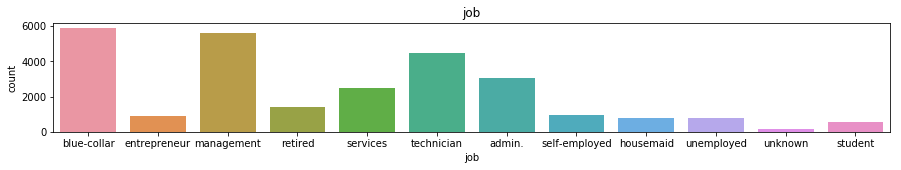

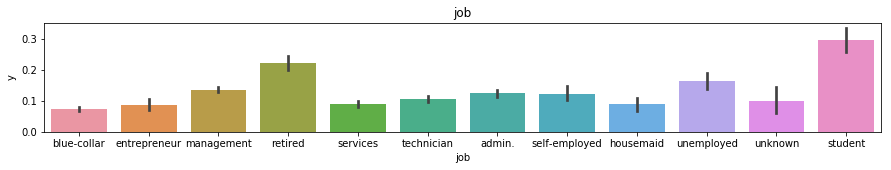

In [95]:
plot_dist_obj(df_train, 'job')
plot_vs_obj(df_train, 'job', 'y')

ダミー化では'unknown'外す

In [96]:
df_new = add_dummies(df_new, df.job)

In [97]:
df_new.head()

,y,age_log,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,1.0,-0.062289,0,1,0,0,0,0,0,0,0,0,0
1,1.0,0.991491,0,0,1,0,0,0,0,0,0,0,0
2,1.0,-0.376709,0,0,0,0,1,0,0,0,0,0,0
3,1.0,1.821543,0,0,0,0,0,1,0,0,0,0,0
4,1.0,-0.964091,0,0,0,0,1,0,0,0,0,0,0


### marital
未婚/既婚

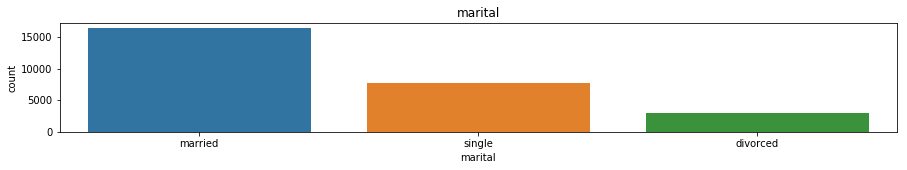

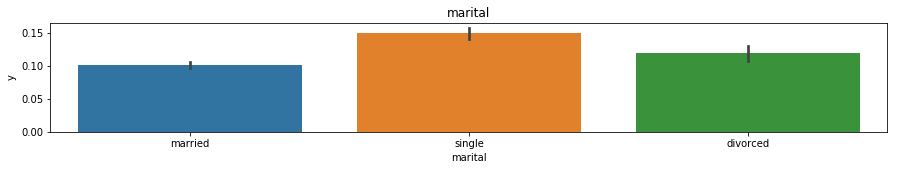

In [98]:
plot_dist_obj(df_train, 'marital')
plot_vs_obj(df_train, 'marital', 'y')

In [99]:
df_new = add_dummies(df_new, df.marital)

### education
教育水準

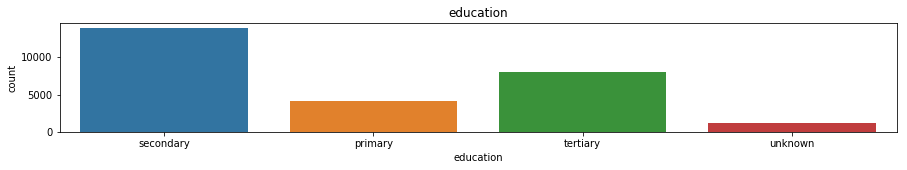

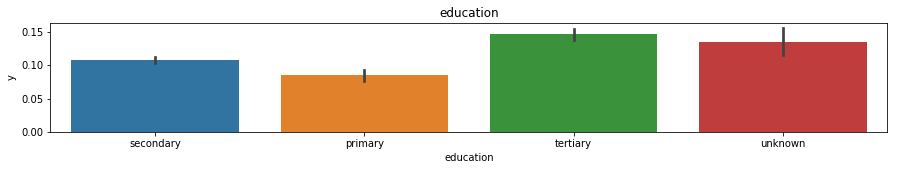

In [100]:
plot_dist_obj(df_train, 'education')
plot_vs_obj(df_train, 'education', 'y')

In [101]:
df_new = add_dummies(df_new, df.education)

In [102]:
df_new.head()

,y,age_log,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
0,1.0,-0.062289,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,1.0,0.991491,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,1.0,-0.376709,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,1.0,1.821543,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,1.0,-0.964091,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


### default
債務不履行があるか

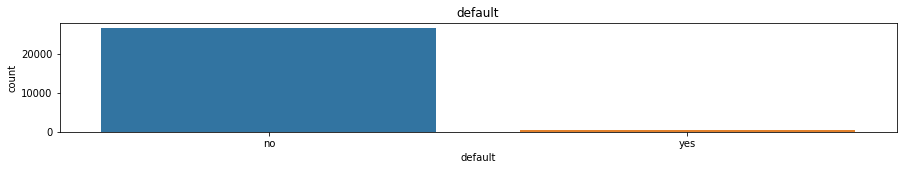

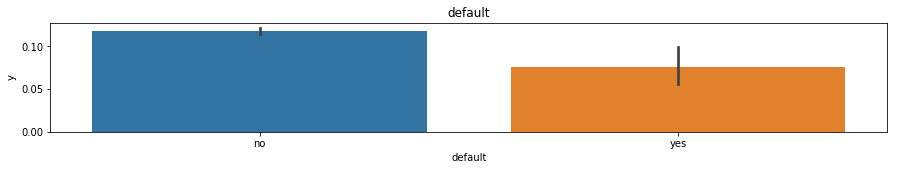

In [103]:
plot_dist_obj(df_train, 'default')
plot_vs_obj(df_train, 'default', 'y')

In [104]:
#df_new = add_dummies(df_new, df.default)
df_new = add_yn_map(df_new, df.default)

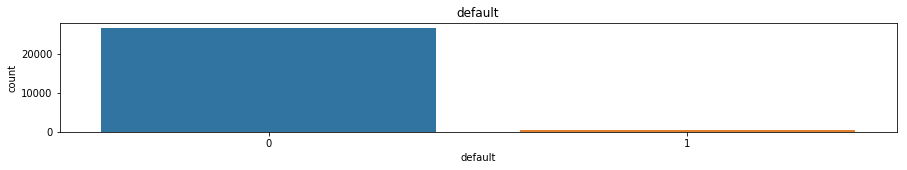

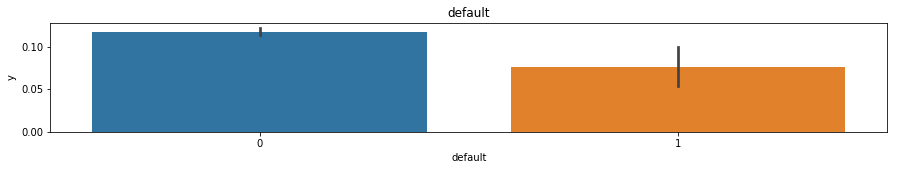

In [105]:
plot_dist_obj(df_new.dropna(), 'default')
plot_vs_obj(df_new.dropna(), 'default', 'y')

### balance
年間平均残高

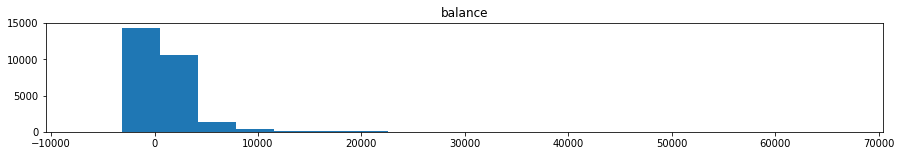

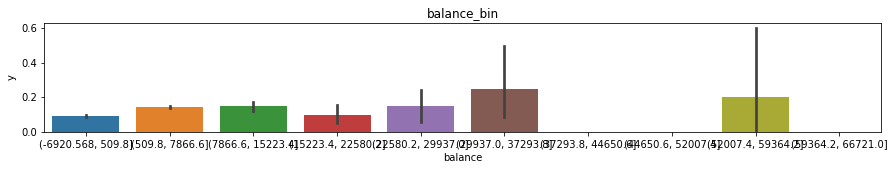

In [106]:
plot_dist_num(df_train, 'balance')
plot_vs_num(df_train, 'balance', 'y')

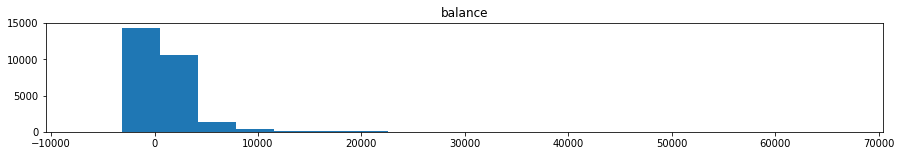

In [107]:
plot_dist_num(df_train, 'balance')

In [108]:
df_new['balance_p'] = df['balance'].where(df.balance>0, np.nan)
df_new['balance_m'] = df['balance'].where(df.balance<0, np.nan)

In [109]:
df_new.head(20)

,y,age_log,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default,balance_p,balance_m
0,1.0,-0.062289,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1756.0,NaN
1,1.0,0.991491,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1443.0,NaN
2,1.0,-0.376709,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,436.0,NaN
3,1.0,1.821543,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,474.0,NaN
4,1.0,-0.964091,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,354.0,NaN
5,1.0,-1.226064,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,260.0,NaN
6,1.0,-0.269082,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,52.0,NaN
7,1.0,-0.839378,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,230.0,NaN
8,1.0,-0.964091,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,NaN,NaN
9,1.0,-0.839378,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1815.0,NaN


In [110]:
df_new['balance_p'] = np.log(df_new['balance_p'])
df_new['balance_m'] = np.log(-df_new['balance_m'])

In [111]:
df_new['balance_p'] = standardize_nan(df_new['balance_p'])
df_new['balance_m'] = standardize_nan(df_new['balance_m'])

In [112]:
df_new.describe()

,y,age_log,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default,balance_p,balance_m
count,27125.000000,4.520800e+04,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,3.792800e+04,3.766000e+03
mean,0.117014,-1.360058e-15,0.114382,0.215272,0.032892,0.027429,0.209167,0.050080,0.034927,0.091886,0.020749,0.168023,0.028822,0.115179,0.601929,0.282892,0.151544,0.513228,0.294151,0.018028,-1.928371e-16,6.114186e-17
std,0.321443,1.000011e+00,0.318279,0.411015,0.178357,0.163331,0.406718,0.218112,0.183598,0.288869,0.142543,0.373891,0.167309,0.319241,0.489506,0.450410,0.358582,0.499831,0.455665,0.133053,1.000013e+00,1.000133e+00
min,0.000000,-3.099491e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.715073e+00,-3.677929e+00
25%,0.000000,-7.185020e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.302397e-01,-4.258228e-01
50%,0.000000,-6.228930e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8.502087e-02,2.238522e-01
75%,0.000000,7.533483e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,6.810430e-01,6.593170e-01
max,1.000000,3.434998e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.039966e+00,2.772019e+00


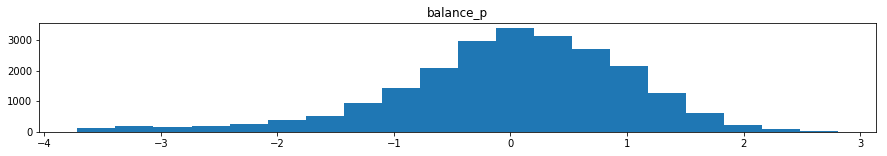

In [113]:
plot_dist_num(df_new.loc[:,['balance_p', 'y']].dropna(), 'balance_p')

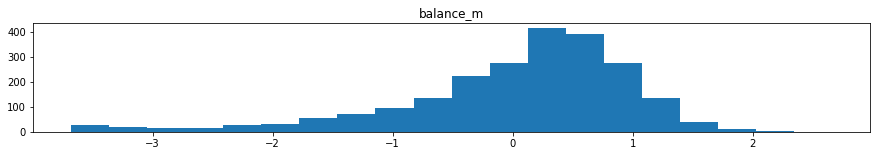

In [114]:
plot_dist_num(df_new.loc[:,['balance_m', 'y']].dropna(), 'balance_m')

nanは-遠方で埋める？

In [115]:
df_new['balance_p'] = df_new['balance_p'].fillna(-10)
df_new['balance_m'] = df_new['balance_m'].fillna(-10)

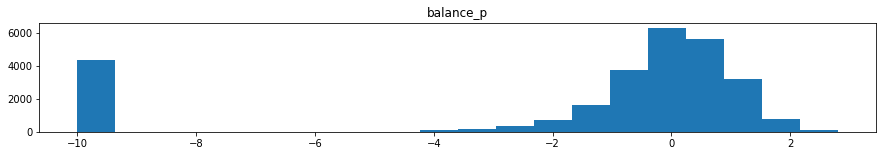

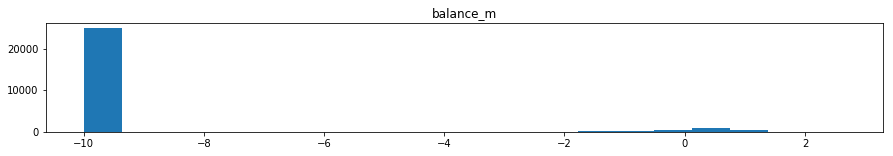

In [116]:
plot_dist_num(df_new.loc[:,['balance_p', 'y']].dropna(), 'balance_p')

plot_dist_num(df_new.loc[:,['balance_m', 'y']].dropna(), 'balance_m')

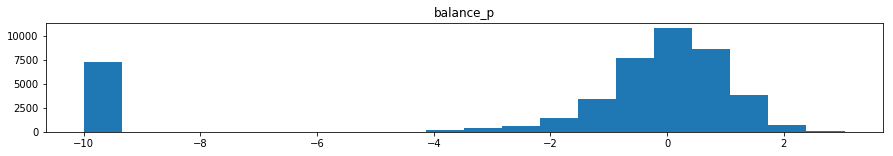

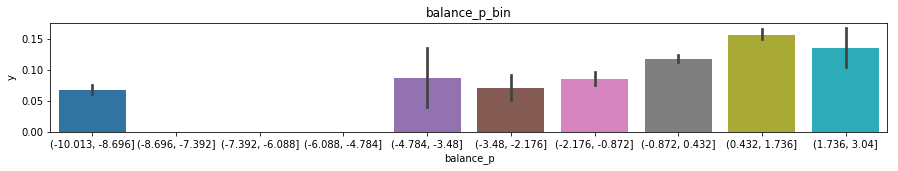

In [117]:
plot_dist_num(df_new, 'balance_p')
plot_vs_num(df_new, 'balance_p', 'y')

In [118]:
df_new['balance_sign'] = np.sign(df['balance'])

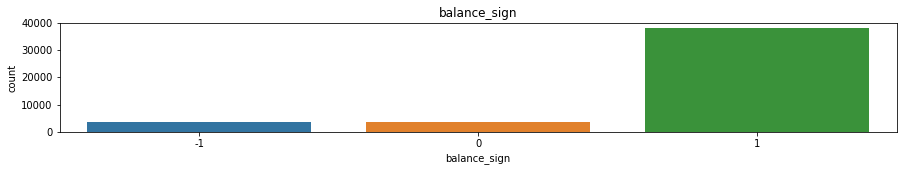

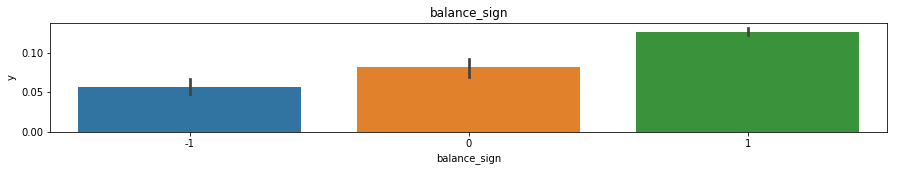

In [119]:
plot_dist_obj(df_new, 'balance_sign')
plot_vs_obj(df_new, 'balance_sign', 'y')

In [120]:
df_new.head(10)

,y,age_log,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default,balance_p,balance_m,balance_sign
0,1.0,-0.062289,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.674389,-10.0,1
1,1.0,0.991491,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0.559045,-10.0,1
2,1.0,-0.376709,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,-0.144157,-10.0,1
3,1.0,1.821543,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,-0.095058,-10.0,1
4,1.0,-0.964091,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,-0.266570,-10.0,1
5,1.0,-1.226064,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,-0.447897,-10.0,1
6,1.0,-0.269082,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,-1.393521,-10.0,1
7,1.0,-0.839378,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,-0.519932,-10.0,1
8,1.0,-0.964091,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,-10.000000,-10.0,0
9,1.0,-0.839378,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0.693806,-10.0,1


### housing
住宅ローン yes/no

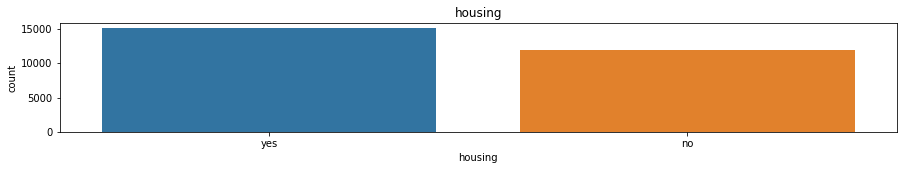

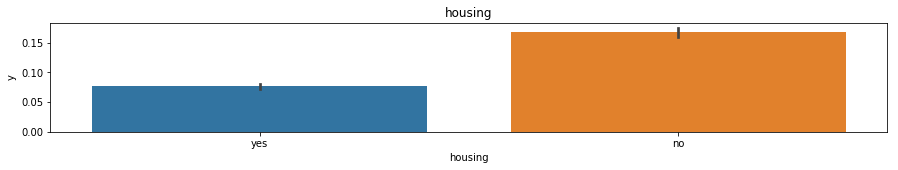

In [121]:
plot_dist_obj(df_train, 'housing')
plot_vs_obj(df_train, 'housing', 'y')

In [122]:
df_new = add_yn_map(df_new, df.housing)

### loan
個人ローン yes/no

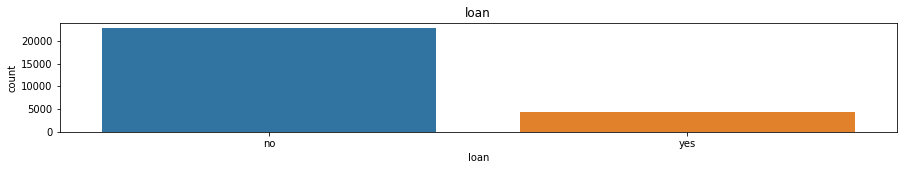

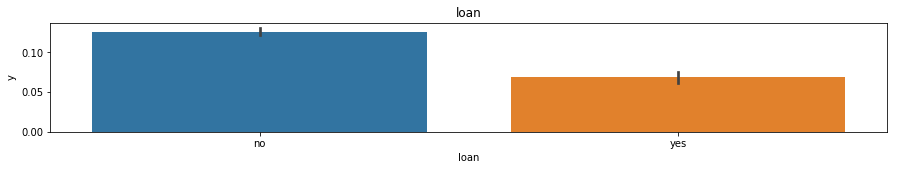

In [123]:
plot_dist_obj(df_train, 'loan')
plot_vs_obj(df_train, 'loan', 'y')
plt.show()

In [124]:
df_new = add_yn_map(df_new, df.loan)

### contact
連絡方法

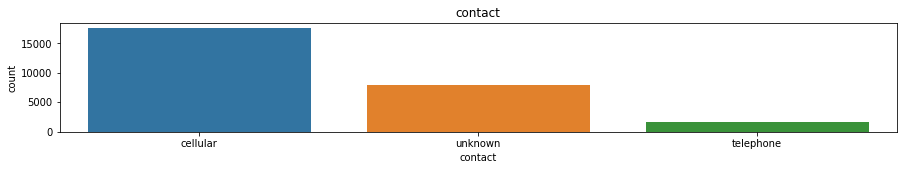

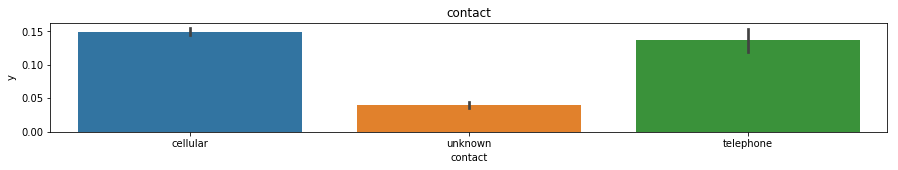

In [125]:
plot_dist_obj(df_train, 'contact')
plot_vs_obj(df_train, 'contact', 'y')
plt.show()

unknownに有意な差

In [126]:
df_new = add_dummies(df_new, df.contact, drop_unknown=False)

In [127]:
df_new.head()

,y,age_log,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default,balance_p,balance_m,balance_sign,housing,loan,contact_cellular,contact_telephone,contact_unknown
0,1.0,-0.062289,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.674389,-10.0,1,1,0,1,0,0
1,1.0,0.991491,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0.559045,-10.0,1,0,0,1,0,0
2,1.0,-0.376709,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,-0.144157,-10.0,1,0,0,1,0,0
3,1.0,1.821543,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,-0.095058,-10.0,1,0,0,1,0,0
4,1.0,-0.964091,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,-0.266570,-10.0,1,0,0,1,0,0


### day
最終接触日

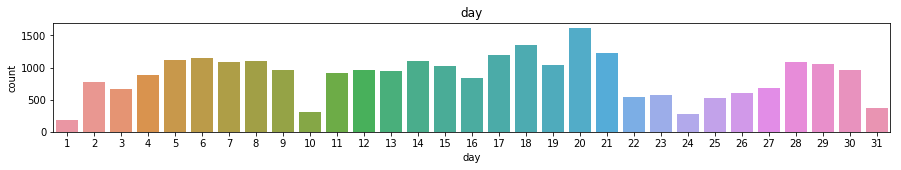

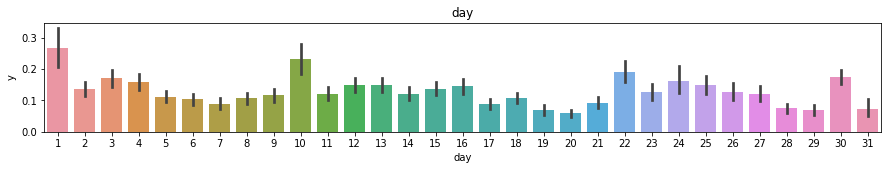

In [128]:
plot_dist_obj(df_train, 'day')
plot_vs_obj(df_train, 'day', 'y')
plt.show()

とりあえず外す

### month
最終接触月

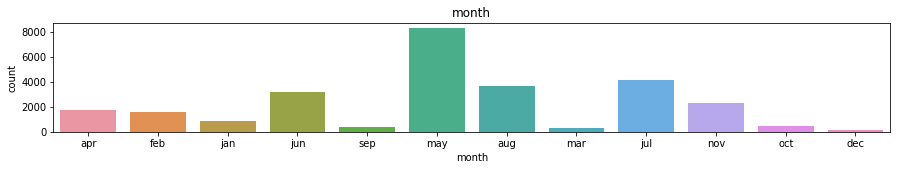

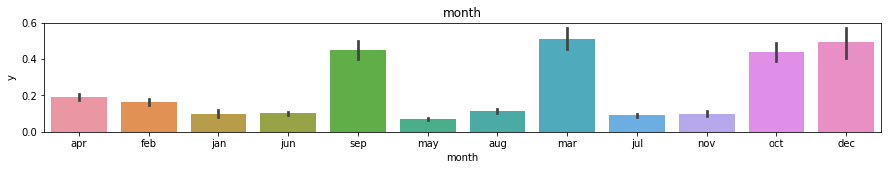

In [129]:
plot_dist_obj(df_train, 'month')
plot_vs_obj(df_train, 'month', 'y')
plt.show()

In [134]:
df_new['month'] = df['month'].map({'jan':1,
                       'feb':2,
                       'mar':3,
                       'apr':4,
                       'may':5,
                       'jun':6,
                       'jul':7,
                       'aug':8,
                       'sep':9,
                       'oct':10,
                       'nov':11,
                       'dec':12
                      })

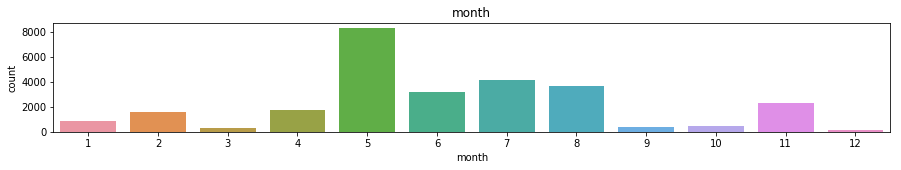

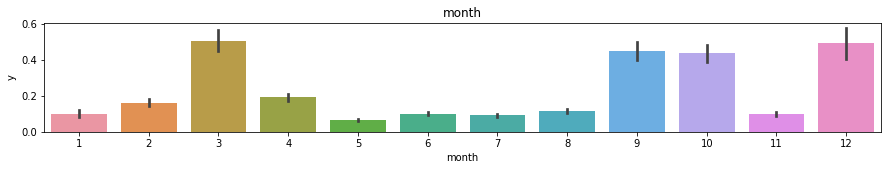

In [136]:
plot_dist_obj(df_new.dropna(), 'month')
plot_vs_obj(df_new.dropna(), 'month', 'y')
plt.show()

なぜか有意な差がある

In [130]:
df_new = add_dummies(df_new, df.month)

### duration
最終接触時間（秒）

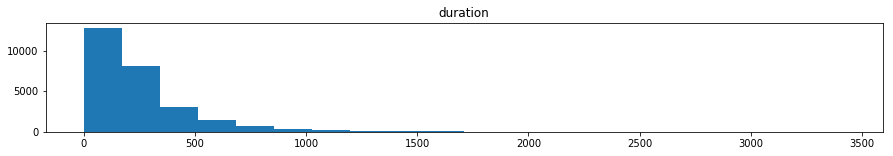

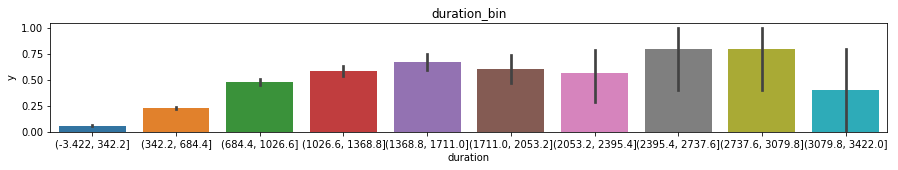

In [131]:
plot_dist_num(df_train, 'duration')
plot_vs_num(df_train, 'duration', 'y')

In [132]:
df_new['duration_log'] = np.log1p(df['duration'])

In [133]:
df_new['duration_log'] = standardize_nan(df_new['duration_log'])

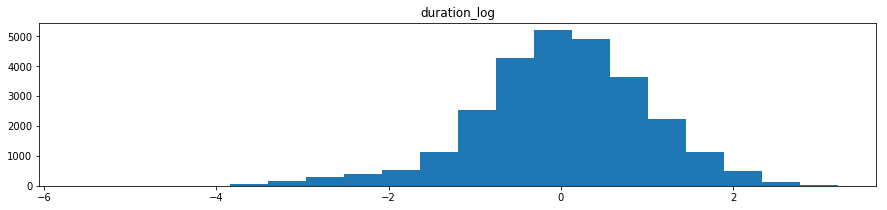

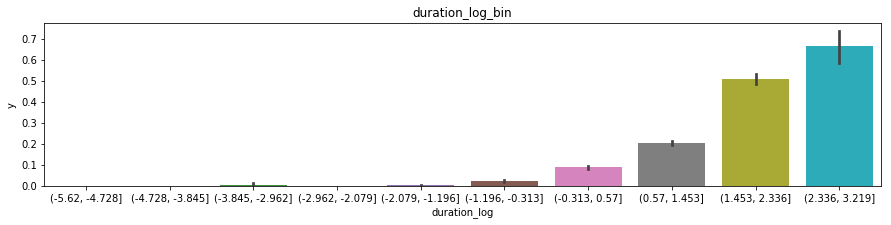

In [313]:
plot_dist_num(df_new.dropna(), 'duration_log')
plot_vs_num(df_new.dropna(), 'duration_log', 'y')

### campaign
現キャンペーンにおける接触回数

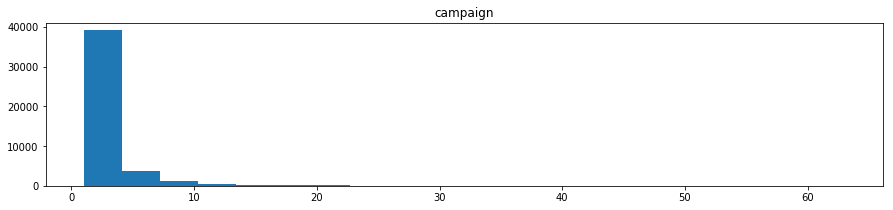

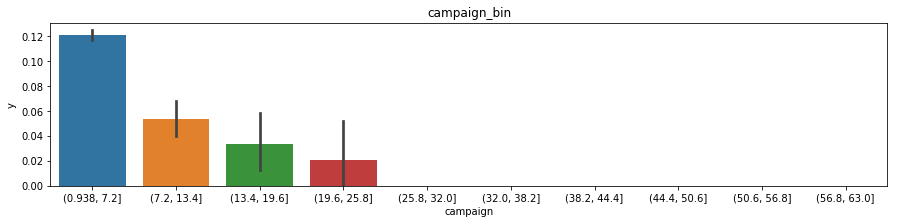

In [314]:
plot_dist_num(df, 'campaign')
plot_vs_num(df, 'campaign', 'y')

In [315]:
df_new['campaign_log'] = np.log1p(df['campaign'])

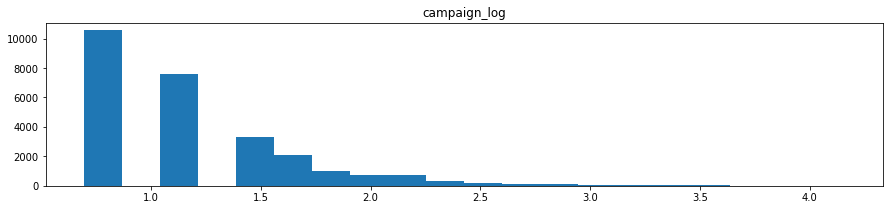

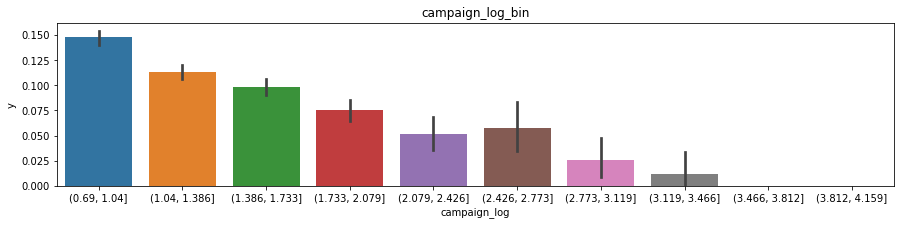

In [316]:
plot_dist_num(df_new.dropna(), 'campaign_log')
plot_vs_num(df_new.dropna(), 'campaign_log', 'y')

### pdays
経過日数：前キャンペーン接触後の日数

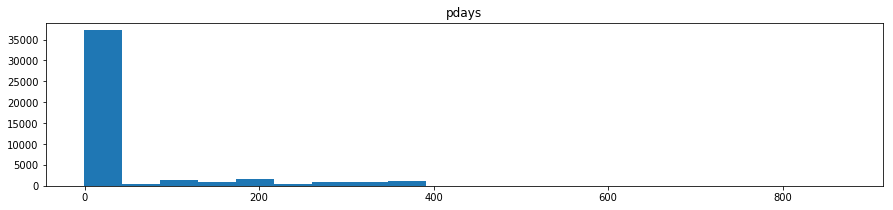

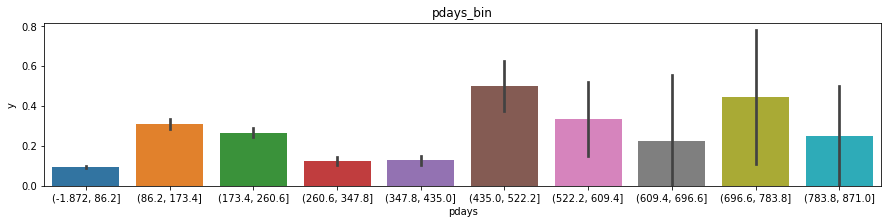

In [317]:
plot_dist_num(df, 'pdays')
plot_vs_num(df, 'pdays', 'y')

In [318]:
df['pdays'].head()

0     -1
1     -1
2    595
3     -1
4      9
Name: pdays, dtype: int64

-1はおかしい  
変な処理で丸められている

In [319]:
df_new['pdays_minus'] = df['pdays'].where(df.pdays==-1, 0)

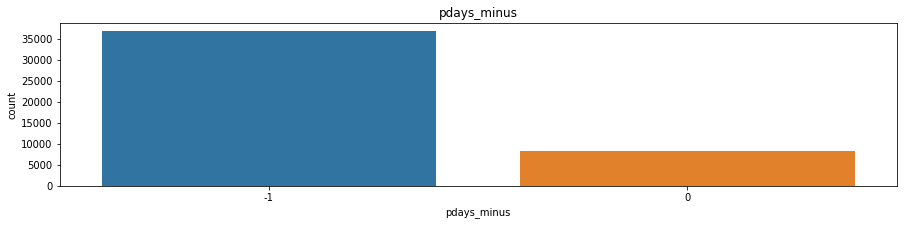

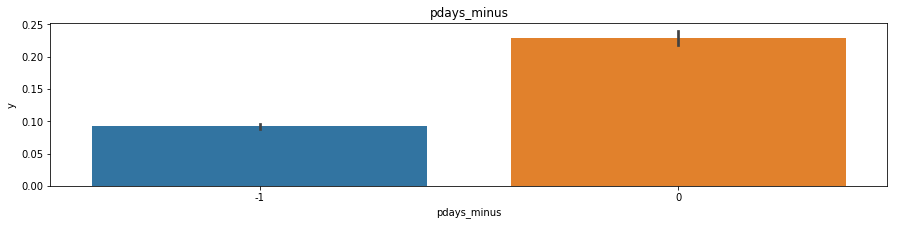

In [320]:
plot_dist_obj(df_new, 'pdays_minus')
plot_vs_obj(df_new, 'pdays_minus', 'y')

In [330]:
df_new['pdays_log'] = df['pdays'].where(df.pdays!=-1, np.nan)

In [331]:
df_new['pdays_log'] = np.log(df_new['pdays_log'])

In [332]:
df_new['pdays_log'] = standardize_nan(df_new['pdays_log'])

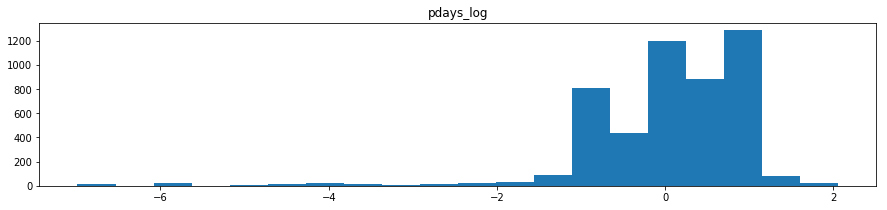

In [333]:
plot_dist_num(df_new.dropna(), 'pdays_log')

nanを-遠方で埋める

In [334]:
df_new['pdays_log'] = df_new['pdays_log'].fillna(-10)

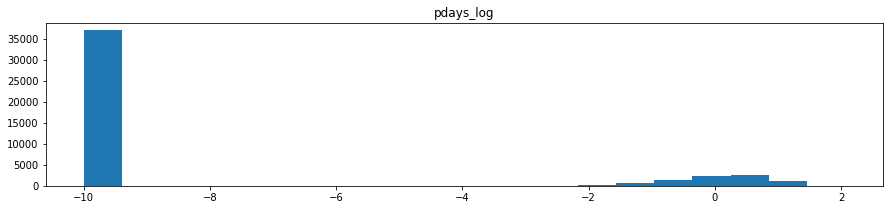

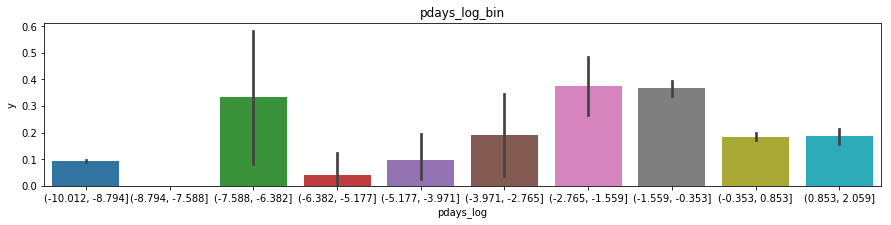

In [335]:
plot_dist_num(df_new, 'pdays_log')
plot_vs_num(df_new, 'pdays_log', 'y')

-7のあたりは外れ値？

#__-1が圧倒的に多いのでこのデータは外す__

In [336]:
#df_new.drop(['pdays_log'], axis=1, inplace=True)

In [337]:
df_new.columns

Index(['y', 'age_log', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'default', 'balance_p', 'balance_m', 'balance_sign', 'housing', 'loan',
       'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'duration_log', 'campaign_log', 'pdays_minus',
       'pdays_log'],
      dtype='object')

### previous
接触実績：現キャンペーン以前までに顧客に接触した回数

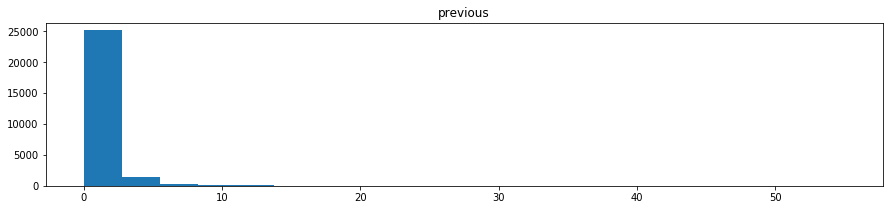

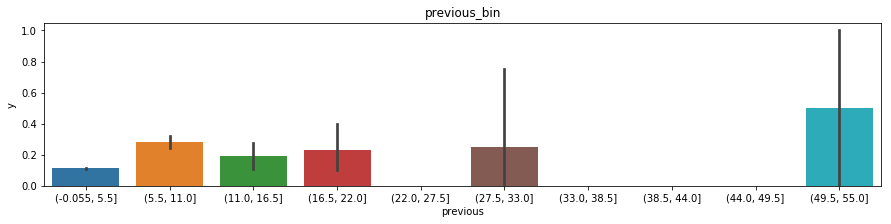

In [338]:
plot_dist_num(df_train, 'previous')
plot_vs_num(df_train, 'previous', 'y')

In [339]:
df.previous.head(10)

0    0
1    0
2    2
3    0
4    2
5    0
6    9
7    8
8    2
9    2
Name: previous, dtype: int64

In [340]:
df_new['previous_log'] = np.log1p(df['previous'])

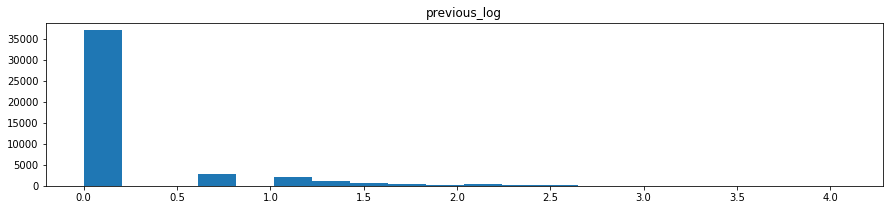

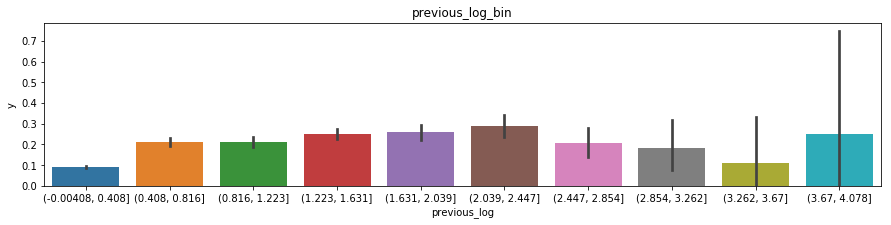

In [341]:
plot_dist_num(df_new, 'previous_log')
plot_vs_num(df_new, 'previous_log', 'y')

0 or not 0 で分離したほうがよさそう  
__previous_logは落とす__

In [342]:
df_new.drop(['previous_log'], axis=1, inplace=True)

In [343]:
df_new['previous_zero'] = df['previous'].where(df.previous==0, 1)

In [344]:
df_new.previous_zero.head(10)

0    0
1    0
2    1
3    0
4    1
5    0
6    1
7    1
8    1
9    1
Name: previous_zero, dtype: int64

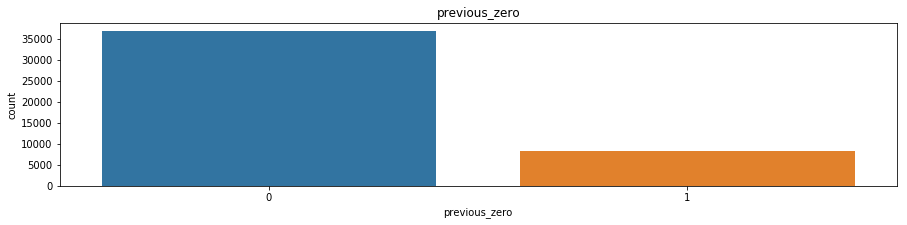

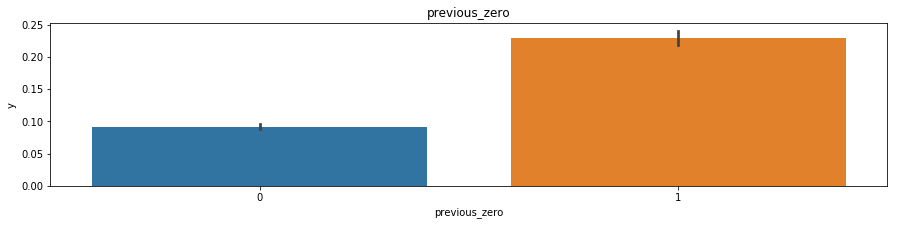

In [345]:
plot_dist_obj(df_new, 'previous_zero')
plot_vs_obj(df_new, 'previous_zero', 'y')

### poutcome
前回のキャンペーンの成果

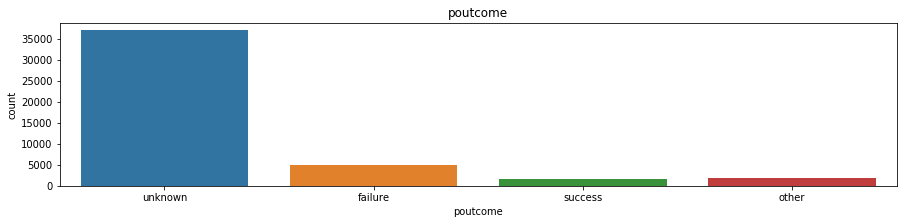

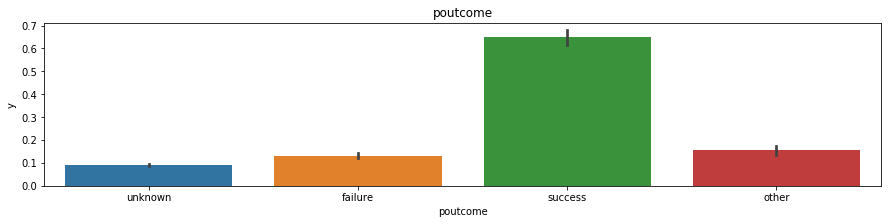

In [347]:
plot_dist_obj(df, 'poutcome')
plot_vs_obj(df, 'poutcome', 'y')

In [348]:
df_new = add_dummies(df_new, df.poutcome)

## 予測

In [349]:
df_new.columns

Index(['y', 'age_log', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'default', 'balance_p', 'balance_m', 'balance_sign', 'housing', 'loan',
       'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'duration_log', 'campaign_log', 'pdays_minus', 'pdays_log',
       'previous_zero', 'poutcome_failure', 'poutcome_other',
       'poutcome_success'],
      dtype='object')

In [350]:
X = df_new.drop(['y'], axis=1)[:train_len].values
y = df_new['y'][:train_len].values

In [351]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [352]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [361]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10)

In [353]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [373]:
y_train_pred = rfc.predict_proba(X_train)

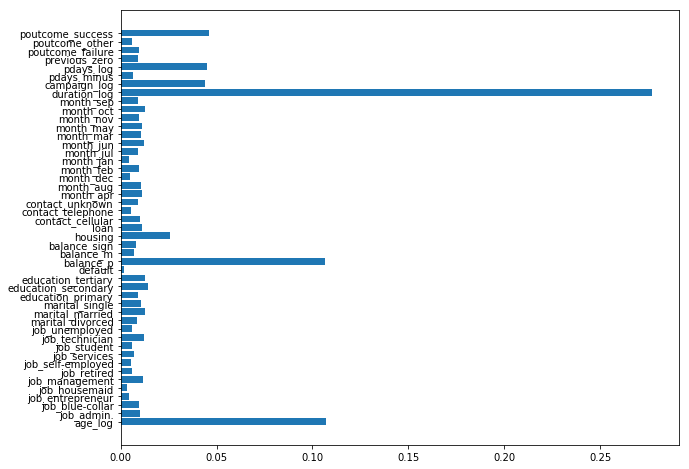

In [387]:
feature_names = df_new.drop(['y'], axis=1).columns
n_features = len(feature_names)
plt.figure(figsize=(10, 8))
plt.barh(range(n_features), rfc.feature_importances_ , align='center')
plt.yticks(np.arange(n_features), feature_names)
plt.show()

### 予測スコア

In [412]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_test_pred[:,1])

0.9209793695773285

## 提出

In [388]:
X_sub = df_new.drop(['y'], axis=1)[train_len:].values

In [389]:
len(X_sub)

18083

In [399]:
y_sub_pred = rfc.predict_proba(X_sub)
y_sub_pred = y_sub_pred[:,1]

In [400]:
submission = pd.Series(y_sub_pred, index=np.arange(1, len(y_sub_pred)+1))

In [404]:
submission.head()

1    0.54
2    0.62
3    0.00
4    0.00
5    0.03
dtype: float64

In [405]:
submission.to_csv('../output/submission.csv')